In [55]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import sys
sys.path.append("../vicki/")
from utils.data_processing import parse_input


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
input_path = "../new_data/Train/"
X_all, y_all = parse_input(input_path, age_to_group=True)

In [56]:
from sklearn.model_selection import KFold
import math
from utils.scoring import age_score

def k_fold_age(X, y, model, age_to_group=True, n_splits=5):
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(X)
    k_results = {"train": [], "test": []}
    for train_index, test_index in kf.split(X['user_id']):
        X_train = {}
        X_test = {}
        train_user_ids = X['user_id'][train_index]
        test_user_ids = X['user_id'][test_index]
        for key, value in X.items():
            if key == "user_id":
                X_train[key], X_test[key] = train_user_ids, test_user_ids
            else:
                X_train[key], X_test[key] = X[key].loc[train_user_ids], X[key].loc[test_user_ids]
        y_train, y_test = y.loc[train_user_ids], y.loc[test_user_ids]
        model.fit(X_train, y_train)
        
        y_pred_train = model.predict(X_train)
        # print(f"y_pred_train.shape = {y_pred_train.shape}, y_train.shape = {y_train.shape}")
        train_score = age_score(y_pred_train, y_train, age_to_group)
        k_results['train'].append(train_score)

        y_pred_test = model.predict(X_test)
        test_score = age_score(y_pred_test, y_test, age_to_group)
        k_results['test'].append(test_score)

    for key, result in k_results.items():
        print(
            # f"{key} : {np.mean(result)} +- {1.96 * np.std(result) / math.sqrt(len(result))}")
            f"{key} : {np.mean(result)} +- {1.96 * np.std(result)}")
    return k_results


In [53]:
from models.age_estimator import AgeEstimator

agemodel_1 = AgeEstimator(n_estimators=1000)
k_fold_age(X_all, y_all['age'], agemodel_1)


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


KeyboardInterrupt: 

In [63]:
models_vary_estimators = [AgeEstimator(n_estimators=10), 
                          AgeEstimator(n_estimators=100), 
                          AgeEstimator(n_estimators=200),
                          AgeEstimator(n_estimators=500),
                          AgeEstimator(n_estimators=1000),
                          AgeEstimator(n_estimators=1500)]
results_vary_estimators = []

for model in models_vary_estimators:
    results_vary_estimators.append(k_fold_age(X_all, y_all['age'], model))

/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.0779151  0.00346821 0.00967742 0.98531989]
[0.04444444 0.         0.         0.98371041]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.13199795 0.         0.         0.96609043]
[0.1123348  0.         0.         0.96024201]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.11612234 0.0036452  0.02893891 0.97156711]
[0.13983051 0.         0.01351351 0.95759717]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.12454593 0.         0.003367   0.96893589]
[0.092827   0.         0.         0.97256637]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.06391753 0.0373494  0.02287582 0.98740053]
[0.06507592 0.04186047 0.         0.97467249]
train : 0.6098947368421053 +- 0.0029692634116487886
test : 0.6023157894736842 +- 0.01835630896096382


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.05910801 0.00231214 0.00967742 0.99320771]
[0.02407407 0.         0.         0.99276018]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.08269132 0.00121212 0.         0.98958333]
[0.06387665 0.01818182 0.         0.98271392]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.06998445 0.0036452  0.0096463  0.99140401]
[0.08686441 0.         0.         0.98321555]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.05241308 0.0083632  0.         0.99294999]
[0.01687764 0.         0.         0.99469027]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.07371134 0.00963855 0.         0.99049514]
[0.07158351 0.02325581 0.         0.98253275]
train : 0.6094999999999999 +- 0.002869013748519925
test : 0.6030526315789474 +- 0.022698487728312504


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.09188608 0.01734104 0.         0.98882559]
[0.04444444 0.00555556 0.         0.98823529]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.10734463 0.01939394 0.         0.98803191]
[0.07929515 0.04545455 0.         0.980121  ]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.093831   0.02430134 0.00321543 0.9889795 ]
[0.11228814 0.02252252 0.         0.97526502]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.07887909 0.03106332 0.         0.99030623]
[0.02531646 0.         0.         0.9920354 ]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.10051546 0.02048193 0.         0.98806366]
[0.10629067 0.02790698 0.         0.9790393 ]
train : 0.6164736842105263 +- 0.0022148939307907196
test : 0.6071578947368421 +- 0.025407854392292633


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.19613111 0.11560694 0.03225806 0.98093777]
[0.08148148 0.03888889 0.         0.97737557]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.21212121 0.10787879 0.01898734 0.97783688]
[0.11453744 0.11818182 0.         0.96283492]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.19284603 0.11421628 0.05144695 0.97950187]
[0.20974576 0.09009009 0.         0.9434629 ]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.18681889 0.11947431 0.03030303 0.97752809]
[0.0907173  0.00480769 0.         0.98318584]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.20721649 0.12289157 0.00980392 0.97877984]
[0.17136659 0.09302326 0.         0.94934498]
train : 0.6483947368421052 +- 0.003956478470010455
test : 0.6158947368421053 +- 0.0243015128742603


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.32079527 0.26358382 0.19354839 0.97436459]
[0.1462963  0.07777778 0.         0.95022624]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.32871084 0.23151515 0.15189873 0.97007979]
[0.14537445 0.17727273 0.05797101 0.9394987 ]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.32711249 0.23936817 0.18971061 0.97200793]
[0.26694915 0.14414414 0.05405405 0.91519435]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.3124027  0.24611708 0.1986532  0.9691562 ]
[0.14767932 0.02884615 0.         0.9699115 ]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.33556701 0.25060241 0.16339869 0.97104332]
[0.24511931 0.13488372 0.08860759 0.91528384]
train : 0.6961315789473685 +- 0.0070033498909658235
test : 0.6216842105263158 +- 0.022099878642451394


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.3895755  0.35491329 0.31935484 0.97326906]
[0.17037037 0.08333333 0.         0.93936652]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.40780688 0.33090909 0.27848101 0.96675532]
[0.18061674 0.21818182 0.10144928 0.92912705]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.39761534 0.33171324 0.28938907 0.97046507]
[0.31355932 0.16666667 0.06756757 0.89487633]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.38297872 0.3297491  0.35353535 0.96893589]
[0.1835443  0.03846154 0.         0.96106195]


/ai/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


[0.41030928 0.32048193 0.29084967 0.97148541]
[0.27331887 0.17209302 0.11392405 0.89344978]
train : 0.728578947368421 +- 0.005400786235980742
test : 0.6248421052631579 +- 0.024169786867697413


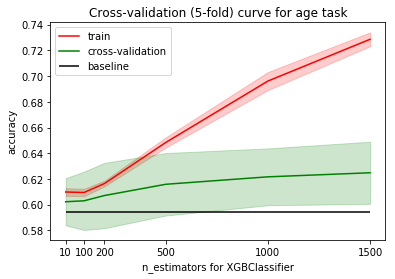

In [65]:
from matplotlib import pyplot as plt
# results_vary_estimators
train_means = np.array([np.mean(res['train']) for res in results_vary_estimators])
train_std = np.array([np.std(res['train'])*1.96 for res in results_vary_estimators])
test_means = np.array([np.mean(res['test']) for res in results_vary_estimators])
test_std = np.array([np.std(res['test'])*1.96 for res in results_vary_estimators])
n_estimators = [10, 100, 200, 500, 1000, 1500]
plt.plot(n_estimators, train_means, label="train", color='r')
plt.fill_between(n_estimators, train_means-train_std, train_means+train_std, color='r', alpha=0.2)
plt.plot(n_estimators, test_means, label='cross-validation', color='g')
plt.fill_between(n_estimators, test_means-test_std, test_means+test_std, color='g', alpha=0.2)
plt.hlines(y=.594, xmin=10, xmax=1500, label="baseline")
plt.xticks(n_estimators, n_estimators)
plt.xlabel("n_estimators for XGBClassifier")
plt.ylabel("accuracy")
plt.title("Cross-validation (5-fold) curve for age task")
plt.legend()

7
